## import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# func
def freq_dis( column ):
    '''returns a frequency distribution of a column.'''
    d = {}
    for i in list(column):
        if i in d.keys(): d[i] += 1
        else: d[i] = 1
    # sort by value.
    d = dict( sorted(d.items(), key=lambda x: x[1] ))
    return d

def validate_date_year(d):
    '''validate date for analysis. check for dates that are more than 100 year old and to find outlines.'''
    current_year = 2023
    invalide_dates = {}
    for i in list(d):
        if i and len(i) > 0:
            if (current_year - int(i.split('-')[0])) > 100:
                if i in invalide_dates.keys():
                    invalide_dates[i] += 1
                else:
                    invalide_dates[i] = 1
    return invalide_dates

def validate_date_month_day(d):
    '''validate the month and day of the month from the data.'''
    invalide_dates = {}
    for i in list(d):
        if i and len(i) > 0:
            if not(int(i.split('-')[1]) > 0 and int(i.split('-')[1]) < 13) or not(int(i.split('-')[2]) > 0 and int(i.split('-')[2]) < 32):
                if i in invalide_dates.keys():
                    invalide_dates[i] += 1
                else:
                    invalide_dates[i] = 1
    return invalide_dates

## load dataset from provided file, in the correct excel sheet

In [4]:
df = pd.read_excel("./KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)
df.head()

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_40356/613519421.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("./KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
# check tenure
tenure = df['tenure']
print(f"feature sample shape: {tenure.shape}" )
print(f"unique values: {tenure.unique()}")
print(f"data distribution: { freq_dis(tenure)}" )
print(f"\nfeature description:\n{tenure.describe()}" )
print(f"\nfeature value counts:\n{tenure.value_counts()}" )
# 

feature sample shape: (4000,)
unique values: [11. 16. 15.  7.  8. 13. 20.  9.  6.  1. 18. 21. 12. 19. 14.  4. 22.  5.
 17.  2.  3. 10. nan]
data distribution: {nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 21.0: 54, 22.0: 55, 20.0: 96, 2.0: 150, 19.0: 159, 3.0: 160, 1.0: 166, 15.0: 179, 17.0: 182, 13.0: 191, 4.0: 191, 6.0: 192, 9.0: 200, 14.0: 200,

In [6]:
# check owns_car feature
owns_car = df['owns_car']
print(f"feature sample shape: {owns_car.shape}" )
print(f"unique values: {owns_car.unique()}" )
print(f"data distribution: { freq_dis(owns_car)}" )

feature sample shape: (4000,)
unique values: ['Yes' 'No']
data distribution: {'No': 1976, 'Yes': 2024}


In [7]:
# check default
default = df['default']
default.unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()',
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«ÍiÌÌ¹ÍÌ³

In [8]:
# check deceased_indicator
deceased = df['deceased_indicator']
print(f"unique: {deceased.unique()}")
print(f"data distribution: {freq_dis(deceased)}")

unique: ['N' 'Y']
data distribution: {'Y': 2, 'N': 3998}


In [25]:
# check wealth_segment
wealth = df['wealth_segment']
print(f"unique values: {wealth.unique()}")
print(f"values distribution: {freq_dis(wealth)}")
print(f"\nvalues counts:\n{wealth.value_counts()}")

unique values: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
values distribution: {'Affluent Customer': 979, 'High Net Worth': 1021, 'Mass Customer': 2000}

values counts:
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


In [10]:
# check job_industry_category for consistency.
job_category = df['job_industry_category']
print(f"Unique: {job_category.unique()}")
freq_dis(job_category)

Unique: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']


{'Telecommunications': 72,
 'Argiculture': 113,
 'Entertainment': 136,
 'IT': 223,
 'Property': 267,
 'Retail': 358,
 'Health': 602,
 nan: 656,
 'Financial Services': 774,
 'Manufacturing': 799}

In [11]:
# check job title feature
freq = freq_dis( df['job_title'])
freq

{'Developer I': 1,
 'Health Coach I': 3,
 'Health Coach III': 3,
 'Research Assistant III': 3,
 'Administrative Assistant II': 4,
 'Database Administrator II': 4,
 'Database Administrator I': 4,
 'Programmer Analyst IV': 4,
 'Human Resources Assistant IV': 4,
 'Staff Accountant I': 4,
 'Computer Systems Analyst III': 4,
 'Geologist II': 4,
 'Account Representative II': 4,
 'Systems Administrator IV': 4,
 'Research Assistant I': 5,
 'Developer IV': 5,
 'Automation Specialist III': 5,
 'Biostatistician III': 5,
 'Research Assistant IV': 5,
 'Staff Accountant IV': 5,
 'Media Manager I': 6,
 'Web Developer II': 6,
 'Safety Technician IV': 6,
 'Web Designer III': 6,
 'Budget/Accounting Analyst III': 6,
 'Programmer IV': 6,
 'Software Engineer IV': 6,
 'Statistician III': 6,
 'Web Developer I': 6,
 'Administrative Assistant I': 6,
 'Account Representative III': 6,
 'Web Developer IV': 6,
 'Programmer I': 6,
 'Human Resources Assistant II': 6,
 'Office Assistant IV': 6,
 'Software Engineer I'

In [12]:
# date of birth. | DOB Column.
dob = df['DOB']
print(f"total count : {dob.shape[0]}")
print(f"unique count: {dob.nunique()}")
# lambda x: x.strftime('%Y-%m-%d') if not pd.isna(x) else ''
date_ = dob.dt.date.apply( lambda x: x.strftime('%Y-%m-%d') if not pd.isna(x) else '' )
print(f"wrong years: {validate_date_year(date_)}")
print(f"wrong months or days: {validate_date_month_day(date_)}")

total count : 4000
unique count: 3448
wrong years: {'1843-12-21': 1}
wrong months or days: {}


In [13]:
# check 'past_3_years_bike_related_purchases' for data consistency and accuracy.
past_3_years = df['past_3_years_bike_related_purchases']
print( f"frequency distribution:\n{freq_dis(past_3_years)}")
print( f"\ndescribe:\n{past_3_years.describe()}")
print( f"\ndescribe:\n{past_3_years.describe()}")

frequency distribution:
{92: 24, 85: 27, 95: 27, 86: 27, 8: 28, 61: 29, 58: 29, 45: 29, 3: 30, 21: 30, 28: 31, 75: 32, 52: 32, 43: 33, 5: 33, 26: 33, 84: 33, 56: 34, 31: 34, 78: 34, 57: 35, 74: 35, 55: 35, 87: 35, 1: 35, 7: 35, 94: 36, 41: 36, 91: 37, 62: 37, 4: 37, 88: 37, 50: 37, 15: 37, 65: 38, 77: 38, 36: 38, 89: 38, 66: 38, 0: 38, 79: 39, 46: 39, 24: 39, 54: 39, 9: 39, 39: 39, 40: 40, 63: 40, 60: 40, 14: 40, 49: 41, 76: 41, 64: 41, 30: 41, 32: 41, 42: 41, 70: 41, 29: 41, 97: 42, 12: 42, 18: 42, 17: 42, 51: 42, 68: 42, 25: 42, 90: 42, 81: 43, 35: 43, 22: 43, 69: 43, 83: 43, 10: 43, 71: 43, 99: 44, 59: 44, 82: 44, 34: 44, 6: 45, 47: 45, 93: 46, 48: 46, 23: 46, 96: 46, 98: 47, 13: 47, 72: 48, 73: 48, 11: 48, 27: 48, 33: 49, 38: 49, 37: 49, 44: 49, 80: 49, 53: 49, 2: 50, 67: 54, 20: 54, 16: 56, 19: 56}

describe:
count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: 

In [14]:
# check the gender column for data consistency
d = {}
for i in list(df['gender']):
    if i in d.keys():
        d[i] += 1
    else:
        d[i] = 1
print(d)

{'F': 1, 'Male': 1872, 'Female': 2037, 'U': 88, 'Femal': 1, 'M': 1}


In [15]:
print(f"dataset shape: {df.shape}\n")
print(df.columns)

dataset shape: (4000, 13)

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')


## check for missing values in the columns.

In [16]:
# identify missing values columns using isnull()
# df.isna().sum()
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                339
owns_car                                 0
tenure                                  87
dtype: int64

In [17]:
# check for missing values using isna()
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                339
owns_car                                 0
tenure                                  87
dtype: int64

In [18]:
# check unique values in features with a lot oh null data
[ x for x in [ str(i).lower() == 'n/a' for i in df['default'] ] if x == True ]

[]

## Identify outliers in the data

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')


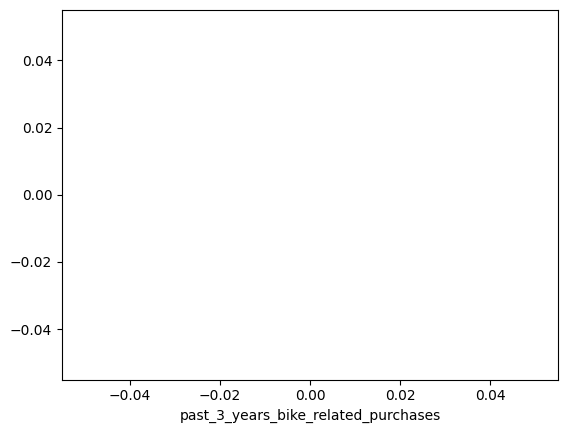

In [19]:
# check for outliers.
print( df.columns )
sns.scatterplot (data=df, x="past_3_years_bike_related_purchases")
# df.boxplot(column="postcode") # postcode, property_valuation
plt.show()

## validate data types

In [20]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

## check for duplicate rows.

In [21]:
# from the result, there are no duplicate data samples.
df[df.duplicated()]
# df[df.duplicated(['customer_id'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


## check data ranges

In [22]:
# use describe method to check for data range. will only check numerical values.
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


## check for consistency.

In [23]:
df.value_counts()

TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

In [ ]:
df.corr()

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_37247/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,past_3_years_bike_related_purchases,tenure
customer_id,1.000000,-0.002529,-0.019947
past_3_years_bike_related_purchases,-0.002529,1.000000,-0.009508
tenure,-0.019947,-0.009508,1.000000
